# Testing Harness

I provide for you here a simple (not complete) testing harness in order to compare your results to scikits and mine for kmeans and PAM. There are mini tests mounted to each of the stubs so you can run them as main program.

4
[[ 1.25272588  1.14674597]
 [-0.1098665   0.04164457]
 [-1.14285937 -1.18839054]]
[[-0.1098665   0.04164457]
 [-1.14285937 -1.18839054]
 [ 1.25272588  1.14674597]]


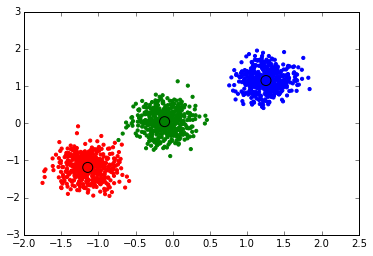

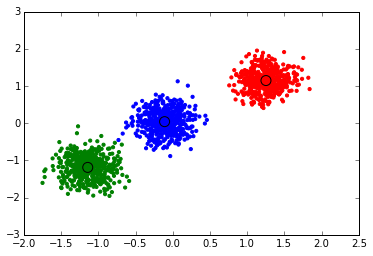

14
[[ 0.21346907  0.84878535]
 [ 1.00736052  0.32675486]
 [-1.14263283 -1.19177189]]
[[ 0.81345059  0.19468482]
 [ 0.33998046  1.012945  ]
 [-1.15423039 -1.19666451]]


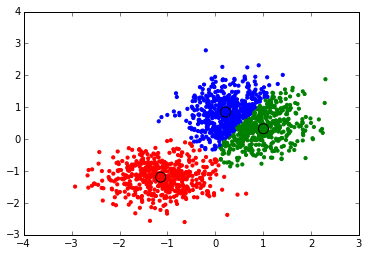

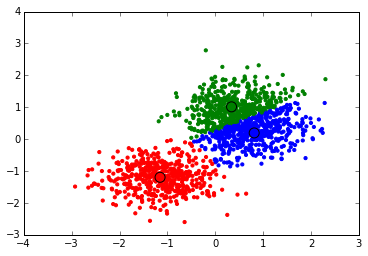

51
[[-0.96068652  0.05116783]
 [-0.15005725  0.96305024]
 [ 0.93424177 -0.92100962]]
[[-0.96068652  0.05116783]
 [ 0.93424177 -0.92100962]
 [-0.15005725  0.96305024]]


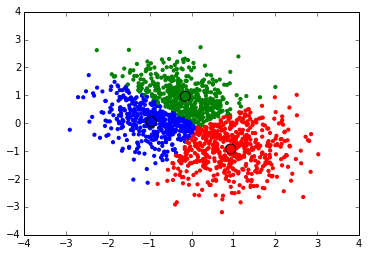

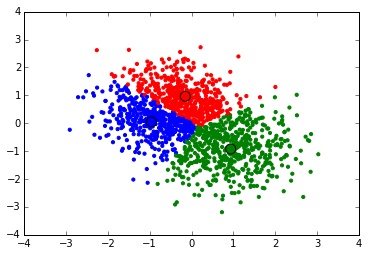

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n_samples = 1500
np.random.seed(42)
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as sKMeans
from kmeans import KMeans # This is your kmeans 
    
#noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
#noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

blobs = datasets.make_blobs(n_samples=n_samples, cluster_std=1.0, random_state=3)
blobs2 = datasets.make_blobs(n_samples=n_samples, cluster_std=2.0, random_state=4)
blobs3 = datasets.make_blobs(n_samples=n_samples, cluster_std=3.0, random_state=5)


colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

#SKdatasets = [noisy_circles, noisy_moons, blobs]

blob_datasets = [blobs, blobs2, blobs3]

for dataset in blob_datasets:
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    kmeans_sk = sKMeans(n_clusters=3, init='random')
    kmeans_sk.fit(X)

    kmeans = KMeans(k=3)
    kmeans.fit(X)
    
    
    algorithms = []
    algorithms.append(kmeans_sk)
    algorithms.append(kmeans)
    
    for algorithm in algorithms:
        #plt.subplot(4, len(clustering_algorithms), plot_num)
        plt.subplots()
        y_pred = algorithm.predict(X)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = np.asarray(algorithm.cluster_centers_)
            print centers
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    plt.show()